#### Import the modules that we will use in our exploratory data analysis

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
sns.set()

In [17]:
# Read dataset

ML_dataset = pd.read_csv("../datasets/movies_dataset.csv")

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14112\184699463.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  ML_dataset = pd.read_csv("../datasets/movies_dataset.csv")


#### Explore dataset

In [18]:
ML_dataset.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [19]:
ML_dataset.tail()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0
45465,False,NaN,0,[],NaN,461257,tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,...,2017-06-09,0.0,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Queerama,False,0.0,0.0


In [20]:
ML_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

#### Keep the atributes that we will be using

In [22]:
ML_dataset = ML_dataset[["title", "overview", "vote_average", "vote_count"]]
ML_dataset.head(3)

,title,overview,vote_average,vote_count
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",7.7,5415.0
1,Jumanji,When siblings Judy and Peter discover an encha...,6.9,2413.0
2,Grumpier Old Men,A family wedding reignites the ancient feud be...,6.5,92.0


In [23]:
ML_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         45460 non-null  object 
 1   overview      44512 non-null  object 
 2   vote_average  45460 non-null  float64
 3   vote_count    45460 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.4+ MB


#### Create wordclouds and see the most frequent words in the overviews and titles

In [24]:
ML_dataset["title"] = ML_dataset["title"].astype(str)        # Columns as strings and fill variables
ML_dataset["overview"] = ML_dataset["overview"].astype(str)
title_words = ' '.join(ML_dataset["title"])
overview_words = ' '.join(ML_dataset["overview"])

#### Create titles word cloud

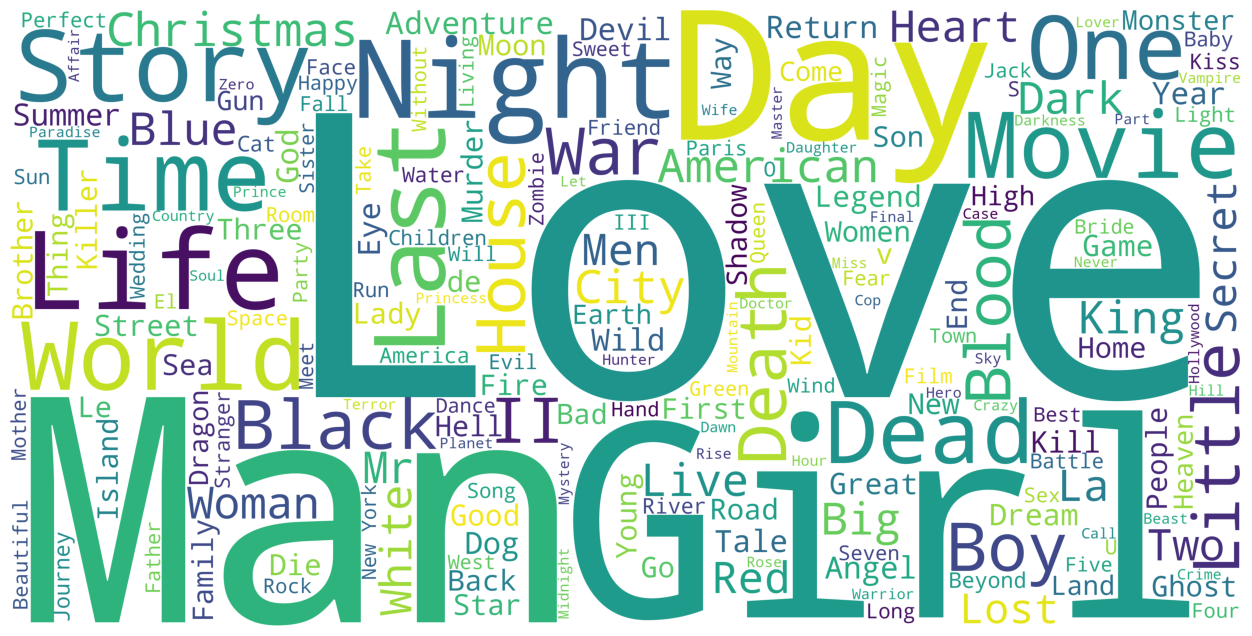

In [25]:
title_cloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_words)
plt.figure(figsize=(16,8))
plt.imshow(title_cloud)
plt.axis('off')
plt.show()

#### Create overviews word cloud

In [ ]:
nube_overview = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_words)
plt.figure(figsize=(16,8))
plt.imshow(nube_overview)
plt.axis('off')
plt.show()

In [ ]:
# Drop unnecessary columns

# Drop

# Unbalanced dataset, poor information

ML_dataset["adult"].value_counts()

In [ ]:
#Drop

# Too much nulls, poor information

ML_dataset["belongs_to_collection"].isnull().sum()


In [ ]:
# Drop 

# We going to keep only the revenue column

ML_dataset["budget"].value_counts()

In [ ]:
# Continue

# Can group movies by the genres they belong

genres = ML_dataset["genres"].value_counts()
genres

In [ ]:
# Example

ML_dataset[ML_dataset["genres"] == "['Thriller', 'Horror', 'Drama', 'Fantasy']"]

In [ ]:
# Drop

# Poor information

ML_dataset["homepage"].value_counts()

In [ ]:
# Drop

# Poor information

ML_dataset["id"].value_counts()

In [ ]:
# Drop

# Poor information

ML_dataset["imdb_id"].value_counts()

In [ ]:
# Continue

# Can group movies by the film record language

language = ML_dataset["original_language"].value_counts()
language

In [ ]:
# Example: group japanese movies

ML_dataset[ML_dataset["original_language"] == "ja"]

In [ ]:
# Drop

# Keep "tile" column

ML_dataset["original_title"].value_counts()

In [ ]:
# Drop

# Poor information

ML_dataset["overview"].value_counts()

In [ ]:
# Continue

# Can group by movie score

ML_dataset["popularity"] = ML_dataset["popularity"].astype(float)
print(ML_dataset["popularity"].value_counts())
print(ML_dataset["popularity"].min())
print(ML_dataset["popularity"].max())

In [ ]:
# Drop

# Poor information

ML_dataset["poster_path"].value_counts()

In [ ]:
# Continue

# Can group by the production company of the movie

ML_dataset["production_companies"] = ML_dataset["production_companies"].astype(str)
company = ML_dataset["production_companies"].value_counts()
company

In [ ]:
# Example

ML_dataset[ML_dataset["production_companies"] == "['Warner Bros.']"]

In [ ]:
# Continue

# Can group by countries where the movie was produced

ML_dataset["production_countries"] = ML_dataset["production_countries"].astype(str)
country = ML_dataset["production_countries"].value_counts()
country

In [ ]:
# Example

# French movies

ML_dataset[ML_dataset["production_countries"] == "['France']"]

In [ ]:
# Continue

# We going to keep only the revenue column 

# Can group by blockbuster movies

ML_dataset["revenue"].value_counts()

In [ ]:
# Continue

# Can group by long and short movies

runtime = ML_dataset["runtime"].value_counts()
runtime

In [ ]:
# Drop

ML_dataset["spoken_languages"].value_counts()

In [ ]:
# Drop

# We want to recommend a released movie

ML_dataset["status"].value_counts()

In [ ]:
# Drop

# Poor information

ML_dataset["tagline"].value_counts()

In [ ]:
# Continue

# Output variable

ML_dataset["title"].value_counts()

In [ ]:
# Drop

# Unbalanced data 

ML_dataset["video"].value_counts()

In [ ]:
# Continue

# Objective variable

print(ML_dataset["vote_average"].value_counts())
print(ML_dataset["vote_average"].min())
print(ML_dataset["vote_average"].max())

In [ ]:
# Continue

# Goes with popularity

ML_dataset["vote_count"].value_counts()

In [ ]:
# Continue

# Can groupy by old and new movies

year = ML_dataset["release_year"].value_counts()
year

In [ ]:
ML_dataset.drop(columns = ["adult", "belongs_to_collection", "budget", "homepage", "id", "imdb_id", "overview", "poster_path", "revenue", "spoken_languages", "status", "tagline", "original_title", "video"], inplace = True)
ML_dataset.head(3)

In [ ]:
ML_dataset.info()

In [ ]:
# Check nulls

ML_dataset.isnull().sum()

In [ ]:
# Drop nulls and duplicates

ML_dataset.dropna(inplace = True)
ML_dataset.drop_duplicates(inplace=True)
ML_dataset.info()

In [ ]:
# Dummy variables

ML_dataset["genres"] = pd.Categorical(ML_dataset["genres"]).codes
ML_dataset["original_language"] = pd.Categorical(ML_dataset["original_language"]).codes
ML_dataset["production_companies"] = pd.Categorical(ML_dataset["production_companies"]).codes
ML_dataset["production_countries"] = pd.Categorical(ML_dataset["production_countries"]).codes
ML_dataset["title"] = pd.Categorical(ML_dataset["title"]).codes

In [ ]:
# Normalization of numerical attributes

scaler = MinMaxScaler() # Class object

numeric_features = ["popularity", "runtime","vote_average", "release_year", "vote_count"]

ML_dataset[numeric_features] = scaler.fit_transform(ML_dataset[numeric_features]) # Transformation

In [ ]:
ML_dataset.head()

In [ ]:
ML_dataset.info()

In [ ]:
corr = ML_dataset.corr()
plt.figure(figsize=(9, 7))
sns.heatmap(corr, annot = True, cmap = 'YlGnBu')
plt.show()

In [ ]:
# Drop redundant columns

ML_dataset.drop(columns = "vote_count", inplace = True)
ML_dataset.head(3)

In [ ]:
ML_dataset.info()

In [ ]:
# Statistics

ML_dataset.describe()

In [ ]:
sns.pairplot(ML_dataset)
plt.show()

In [ ]:
# Save ML dataset

# df = df[["title", "overview", "vote_average", "vote_count"]]
# df
# df.to_csv("ML_dataset.csv", index = False)